In [177]:
import sys
import os
src_path = os.path.join(os.getcwd(), '..')
sys.path.append(src_path)

import torch
import torch.nn as nn
import torchvision as tv
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import random

from src.image_processing import  RandomCropResizeTransform

In [183]:
transforms = [
    tv.transforms.Grayscale(),
    tv.transforms.ToTensor(),
    v2.RandomHorizontalFlip(0.5),
    v2.ColorJitter(0.2, 0.2, 0.2, 0.2),
    RandomCropResizeTransform(38, 64, 0.5)
]

ds1 = tv.datasets.ImageFolder(
    root="./../data/cats1",
    transform=tv.transforms.Compose(transforms)
)

ds2 = tv.datasets.ImageFolder(
    root="./../data/cats2/data",
    transform=tv.transforms.Compose(transforms)
)

ds = torch.utils.data.ConcatDataset([ds1, ds2])

print(len(ds1), ' + ', len(ds2), ' = ', len(ds))

29843  +  18298  =  48141


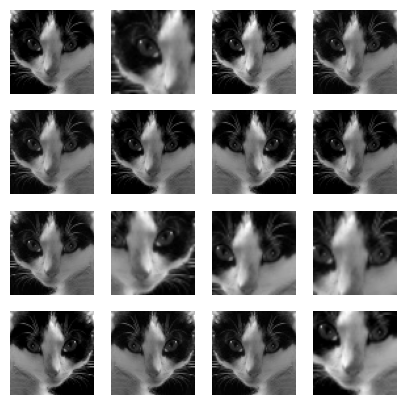

In [179]:
plt.figure(figsize=(5, 5))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.imshow(ds[2005][0].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()

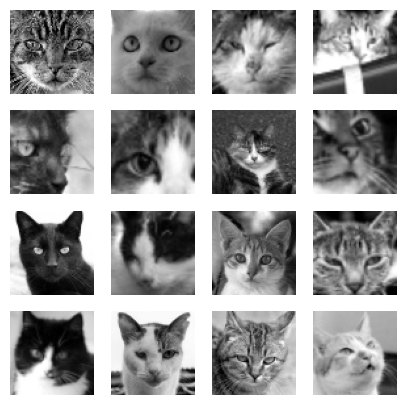

In [180]:
plt.figure(figsize=(5, 5))
for i in range(1, 9):
    plt.subplot(4, 4, i)
    plt.imshow(ds1[i][0].squeeze(), cmap="gray")
    plt.axis("off")
for i in range(9, 17):
    plt.subplot(4, 4, i)
    plt.imshow(ds2[i][0].squeeze(), cmap="gray")
    plt.axis("off")
plt.show()

In [181]:
dl = torch.utils.data.DataLoader(
    ds,
    batch_size=32,
    shuffle=True
)